# Project - EDA with Pandas Using the Ames Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains housing values in the suburbs of Ames.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file ``ames_train.csv``) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data.
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions
Look in ``data_description.txt`` for a full description of all variables.

A preview of some of the columns:

**MSZoning**: Identifies the general zoning classification of the sale.
		
       A	 Agriculture
       C	 Commercial
       FV	Floating Village Residential
       I	 Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

**OverallCond**: Rates the overall condition of the house

       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor

**KitchenQual**: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

**YrSold**: Year Sold (YYYY)

**SalePrice**: Sale price of the house in dollars

In [2]:
# Let's get started importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook

In [10]:
# Loading the data
df = pd.read_csv('ames_train.csv')

In [11]:
# Investigate the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

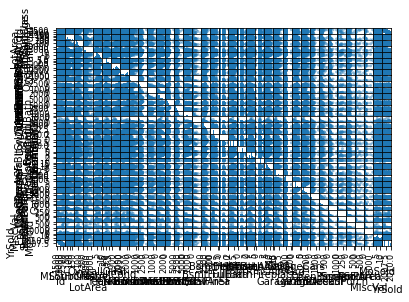

In [5]:
# Investigating Distributions using scatter_matrix
pd.plotting.scatter_matrix(df);

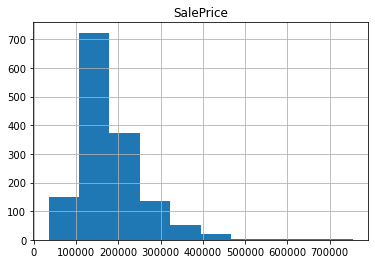

In [20]:
# Create a plot that shows the SalePrice Distribution
df.hist('SalePrice');

In [25]:
# Create a plot that shows the LotArea Distribution

df.hist('LotArea');

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [26]:
df['OverallCond'].describe()

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

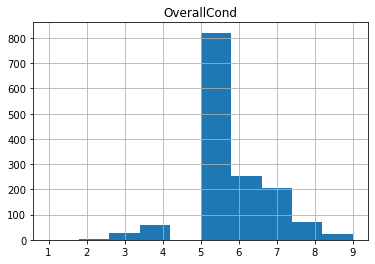

In [22]:
# Create a plot that shows the Distribution of the overall house condition
df.hist('OverallCond');

<AxesSubplot:>

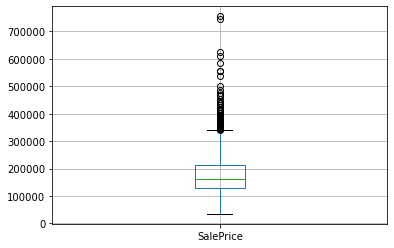

In [27]:
# Create a Box Plot for SalePrice
df.boxplot('SalePrice')

In [29]:
# Perform an Exploration of home values by age

# Create a column for age at the time the home was sold
df['Age_at_sale'] = df['YrSold'] - df['YearBuilt']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Pearson correlation coefficient (r) for Age at Sale and 
    Sale Price is: -0.523350417546816.
There is a moderate negative correlation between these two variables.

Pearson correlation coefficient (r) for Year Built and 
    Sale Price is: 0.5228973328794969.
There is a moderate positive correlation between these two variables.


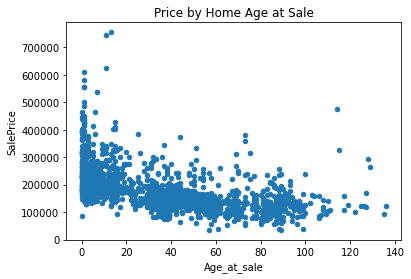

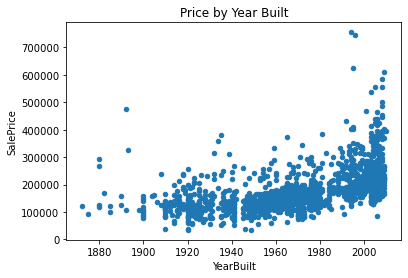

In [46]:
# Perform an Exploration of home values by age

df['Age_at_sale'].describe()
df['SalePrice'].describe()

df.plot.scatter('Age_at_sale', 'SalePrice', title="Price by Home Age at Sale");

df.plot.scatter('YearBuilt', 'SalePrice', title="Price by Year Built");

r_matrixage = np.corrcoef(df['Age_at_sale'], df['SalePrice'])
r_matrixyear = np.corrcoef(df['YearBuilt'], df['SalePrice'])

print(f"""Pearson correlation coefficient (r) for Age at Sale and 
    Sale Price is: {r_matrixage[0][1]}.
There is a moderate negative correlation between these two variables.\n""")

print(f"""Pearson correlation coefficient (r) for Year Built and 
    Sale Price is: {r_matrixyear[0][1]}.
There is a moderate positive correlation between these two variables.

It is unclear whether Sale Price has been adjusted for inflation.""")

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!